## Librerías

In [93]:
# Librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import chi2_contingency


# Configuración para ver todas las columnas del conjunto de datos
pd.set_option('display.max_columns', None)

# Configuración para ver todas las filas del conjunto de metadatos
pd.set_option('display.max_rows', None)

# Desactivar las advertencias 
warnings.filterwarnings('ignore')



## Data

In [62]:
# Metadata
metadata = pd.read_csv('/home/jorfan/Universidad/Semestre_6/ML2/PROYECTO_FINAL/metadata.csv', encoding='ISO-8859-1')
#metadata[['Row', 'Description']]

In [63]:
df = pd.read_csv('/home/jorfan/Universidad/Semestre_6/ML2/PROYECTO_FINAL/train.csv')
df.head(3)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [64]:
# Información general del conjunto de datos
print(df.shape)
df.describe()

(307511, 122)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [65]:
for var in df.columns:
    if len(df[var].unique()) <= 12:
        df[var] = df[var].astype('category')
    elif df[var].dtypes == 'object':
        df[var] = df[var].astype('category')
    else:
        df[var] = df[var].astype('float64')

In [66]:
columnas_categoricas = df.select_dtypes(include=['category']).columns.tolist()

In [67]:
columnas_categoricas.append('CNT_CHILDREN')
columnas_categoricas.append('CNT_FAM_MEMBERS')

In [68]:
len(columnas_categoricas)

59

## Análisis de variables categóricas 

## Valores faltantes

In [69]:
# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = df[columnas_categoricas].isnull().mean() * 100

# Filtrar las columnas que tienen más del 50% de valores faltantes
columns_with_many_missing = missing_percentage[missing_percentage > 20].index.tolist()

# Mostrar las columnas con más del 50% de valores faltantes
print("Columnas con más del 60% de valores faltantes:")
print(columns_with_many_missing, len(columns_with_many_missing))



Columnas con más del 60% de valores faltantes:
['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] 5


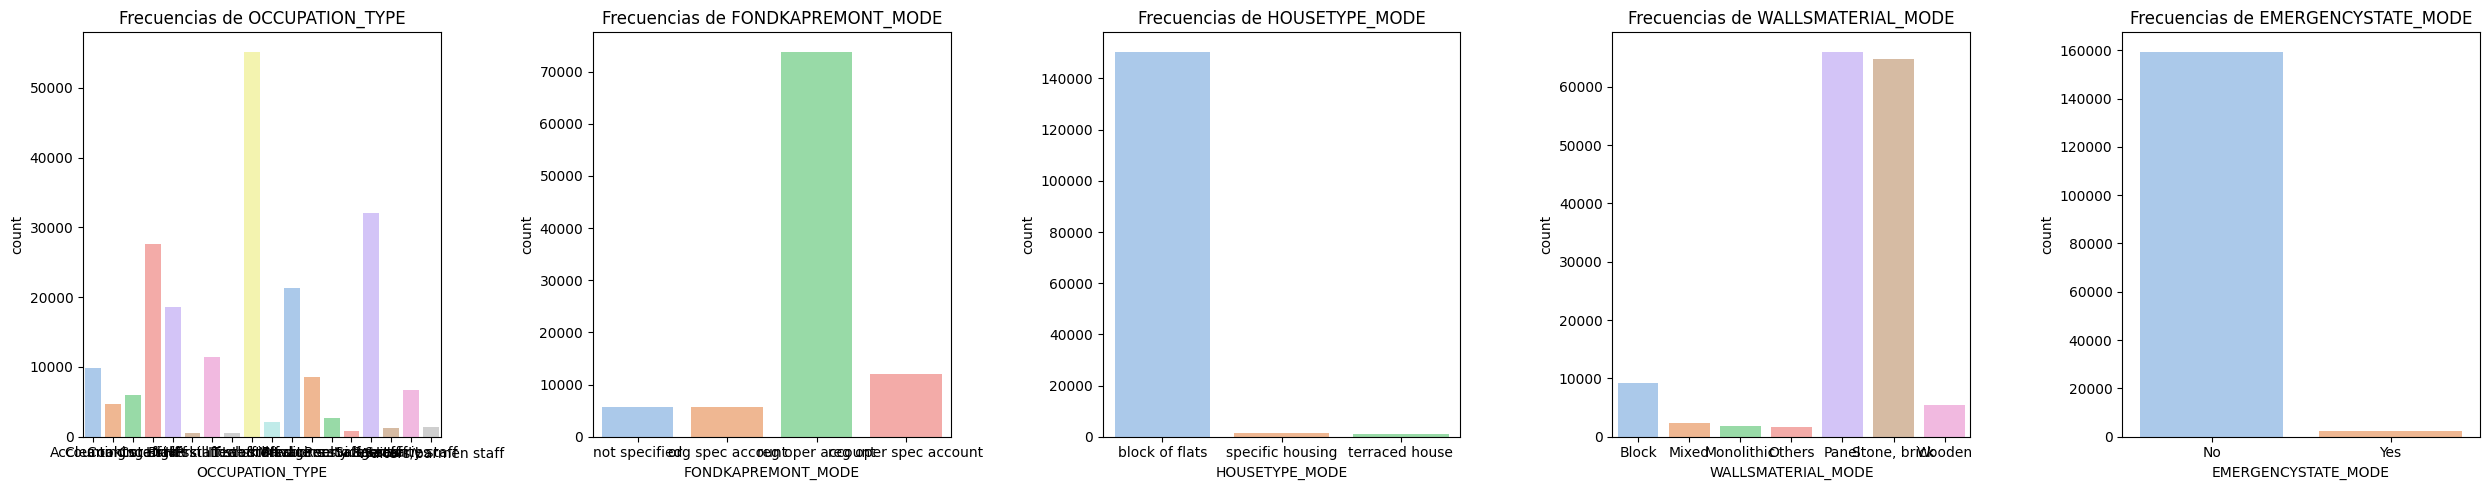

In [70]:
fig, axes = plt.subplots(1, len(columns_with_many_missing), figsize=(5 * len(columns_with_many_missing), 5))

# Iterar sobre las columnas y los ejes
for i, col in enumerate(columns_with_many_missing):
    sns.countplot(x=col, data=df, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Frecuencias de {col}')

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

En esta parte solo se eliminan las 4 ultimas variables
'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'

In [71]:
# se eliminan las variables que continen una gran cantidad de valores nulos 
elementos_a_eliminar = ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

# Eliminar los elementos de 'elementos_a_eliminar'
# columnas categoricas 2, 
columnas_categoricas2 = [x for x in columnas_categoricas if x not in elementos_a_eliminar]

se eliminaran los registros de las variables que tengan menos del 5% de valores faltantes ya que se tienen suficientes datos 

In [79]:
# Calcular el porcentaje de valores faltantes para cada columna
missing_percentage = df[columnas_categoricas2].isnull().mean() * 100

columns_to_clean = missing_percentage[missing_percentage < 5].index

# Eliminar los registros con valores nulos solo en esas columnas
df = df.dropna(subset=columns_to_clean)

verificación de los resgistros de las variables restantes 

In [82]:
nulos_por_columna = df[columnas_categoricas2].isnull().mean()*100

# Filtrar las columnas que tienen al menos un valor nulo
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Mostrar las columnas con valores nulos
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
OCCUPATION_TYPE               31.350468
AMT_REQ_CREDIT_BUREAU_HOUR    13.512539
AMT_REQ_CREDIT_BUREAU_DAY     13.512539
AMT_REQ_CREDIT_BUREAU_WEEK    13.512539
AMT_REQ_CREDIT_BUREAU_QRT     13.512539
dtype: float64


dado que las  variables restantes tienen menor cantidad de valores atípicos, se incluirá a cada variable una categoría llamada "desconocido" y se añadirán los valores nulos a esta categoría

In [83]:
# Se le agrega la categoria desconocido, igual luego quedará en la categoria "otro"

for columna in columnas_categoricas2:
    # Añadir 'Desconocido' a las categorías si no está presente
    df[columna] = df[columna].astype('category')
    if 'Desconocido' not in df[columna].cat.categories:
    # Si no está, agregar 'Desconocido' a las categorías
        df[columna] = df[columna].cat.add_categories('Desconocido')
    
    # Rellenar los valores nulos con 'Desconocido'
    df[columna] = df[columna].fillna('Desconocido')
df[columnas_categoricas2] = df[columnas_categoricas2].fillna('Desconocido')

In [85]:
# Se verifica que ya no hayan nulos 
missing_percentage = df[columnas_categoricas2].isnull().mean() * 100

# Filtrar las columnas que tienen más del 50% de valores faltantes
columns_with_many_missing = missing_percentage[missing_percentage > 0].index.tolist()

# Mostrar las columnas con más del 50% de valores faltantes
print("Columnas con más del 60% de valores faltantes:")
print(columns_with_many_missing, len(columns_with_many_missing))

Columnas con más del 60% de valores faltantes:
[] 0


## Detección de categorías atípicas 

In [86]:
len(columnas_categoricas2)

55

In [87]:
# Este código convierte las categorias de una variable que tengan menos del 10% de los datos en una categoria llamada otros
# Umbral en porcentaje (10%)
threshold = 0.1

# Función para obtener categorías atípicas y agruparlas en "Otros"
def find_low_frequency_categories(df, threshold):
    for col in columnas_categoricas2:
        frequencies = df[col].value_counts(normalize=True)  # Porcentajes
        # Detectar categorías con baja frecuencia relativa
        low_frequency_categories = frequencies[frequencies < threshold]
        
        #print(f"\nCategorías con baja frecuencia relativa en {col} (menos del {threshold*100}%):")
        #print(low_frequency_categories)

        # Si hay más de 3 categorías con baja frecuencia, agruparlas en 'Otros'
        if len(low_frequency_categories) > 2:
            # Crear una nueva columna con 'Otros' para las categorías con baja frecuencia
            df[col] = df[col].apply(lambda x: x if frequencies[x] >= threshold else 'Otros')
            print(f"\nDespués de agrupar, la columna {col} tiene las siguientes categorías:")
            print(df[col].value_counts())

# Aplicar la función a todo el DataFrame
find_low_frequency_categories(df, threshold)



Después de agrupar, la columna NAME_TYPE_SUITE tiene las siguientes categorías:
NAME_TYPE_SUITE
Unaccompanied    247637
Family            40058
Otros             17503
Name: count, dtype: int64

Después de agrupar, la columna NAME_INCOME_TYPE tiene las siguientes categorías:
NAME_INCOME_TYPE
Working                 157661
Commercial associate     70937
Pensioner                54995
Otros                    21605
Name: count, dtype: int64

Después de agrupar, la columna NAME_EDUCATION_TYPE tiene las siguientes categorías:
NAME_EDUCATION_TYPE
Secondary / secondary special    217067
Higher education                  73966
Otros                             14165
Name: count, dtype: int64

Después de agrupar, la columna NAME_FAMILY_STATUS tiene las siguientes categorías:
NAME_FAMILY_STATUS
Married                 195053
Otros                    65163
Single / not married     44982
Name: count, dtype: int64

Después de agrupar, la columna NAME_HOUSING_TYPE tiene las siguientes categorías:


In [ ]:
# Se eliminan las categorias de Desconocidos 
df[columnas_categoricas] = df[columnas_categoricas].apply(lambda x: x.astype('category'))
for columna in columnas_categoricas2:
    # Verificar si la categoría 'Desconocido' está presente y si tiene valores
    if 'Desconocido' in df[columna].cat.categories and df[columna].value_counts().get('Desconocido', 0) == 0:
        # Eliminar la categoría 'Desconocido' si no tiene valores
        df[columna] = df[columna].cat.remove_categories('Desconocido')

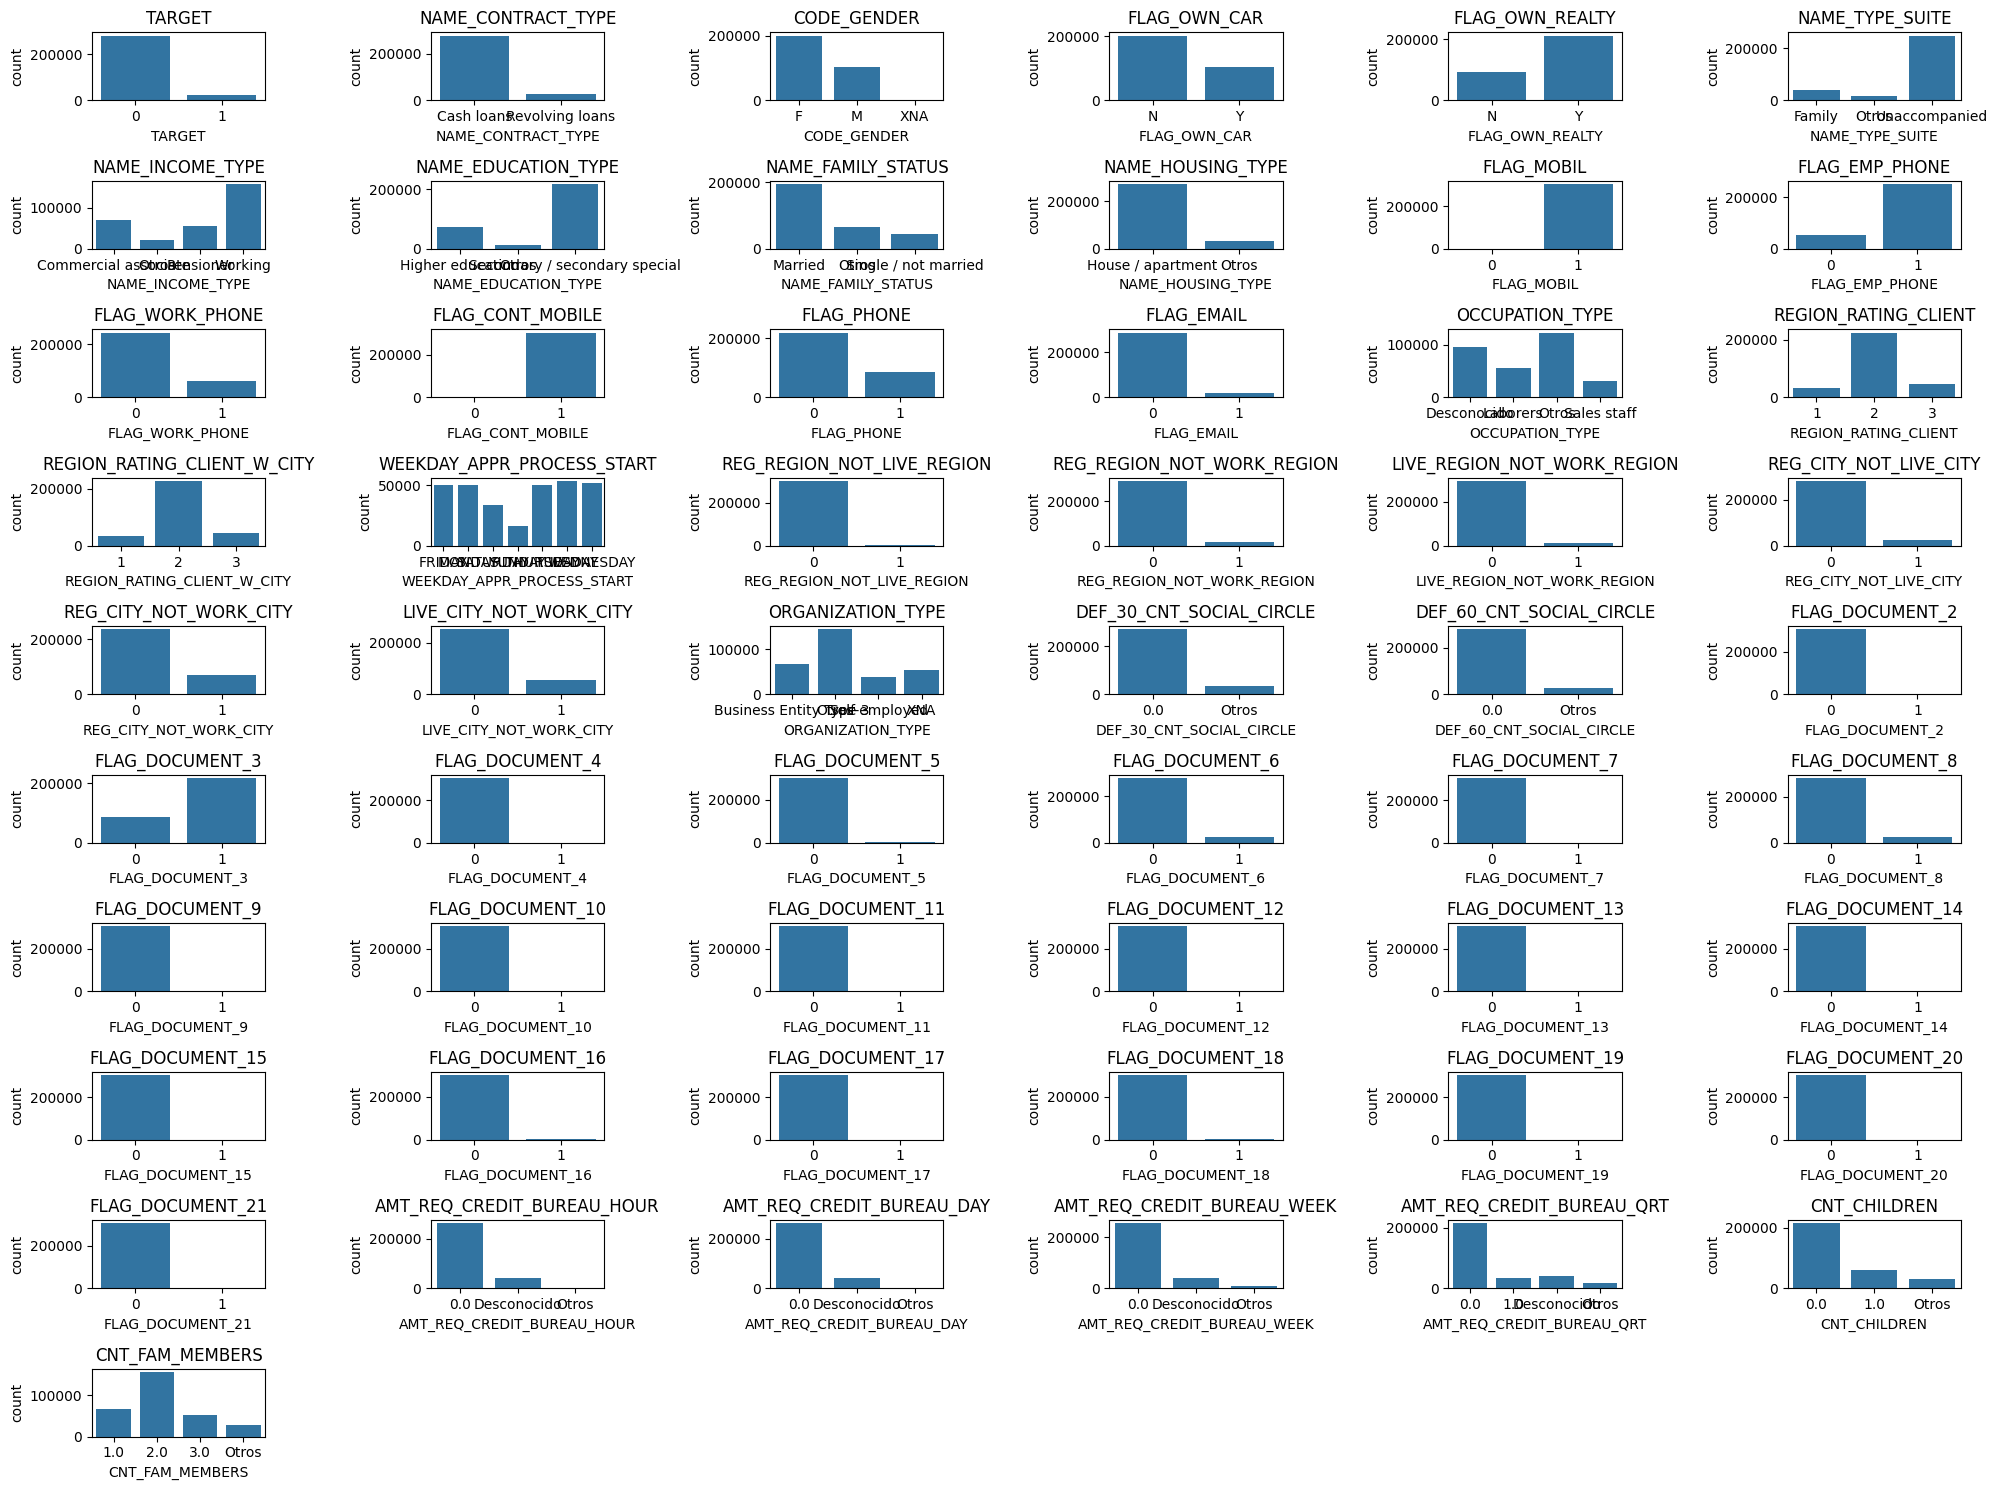

In [ ]:
# 
n_filas = 10
n_columnas = 6
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(20, 15))  # Tamaño ajustable
axes = axes.flatten()  # Aplanamos para un fácil acceso

# Crear gráficos
for i, columna in enumerate(columnas_categoricas2):
    if i < len(axes):  # Evitar errores si hay más columnas que ejes
        sns.countplot(data=df, x=columna, ax=axes[i])
        axes[i].set_title(columna)
    else:
        axes[i].axis('off')  # Ocultar ejes adicionales si no hay más columnas

# Desactivar gráficos vacíos
for j in range(len(columnas_categoricas2), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [95]:
# SE muestra las variables que tienen relación significativa con la variable objetivo 
# Nivel de significancia
alpha = 0.05
relacion_sig =[]
# Iterar sobre las columnas categóricas
for col in columnas_categoricas2:
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[col], df['TARGET'])
    
    # Realizar la prueba de chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Verificar si el valor p es menor que el nivel de significancia
    if p <= alpha:
        relacion_sig.append(col)
        print(f"Variable '{col}' tiene una relación significativa con 'TARGET' (p-value = {p})")


Variable 'TARGET' tiene una relación significativa con 'TARGET' (p-value = 0.0)
Variable 'NAME_CONTRACT_TYPE' tiene una relación significativa con 'TARGET' (p-value = 1.9723403587738673e-61)
Variable 'CODE_GENDER' tiene una relación significativa con 'TARGET' (p-value = 2.9464338043594775e-202)
Variable 'FLAG_OWN_CAR' tiene una relación significativa con 'TARGET' (p-value = 1.9445045024275845e-33)
Variable 'FLAG_OWN_REALTY' tiene una relación significativa con 'TARGET' (p-value = 0.0002056858170853116)
Variable 'NAME_TYPE_SUITE' tiene una relación significativa con 'TARGET' (p-value = 1.618472959364334e-05)
Variable 'NAME_INCOME_TYPE' tiene una relación significativa con 'TARGET' (p-value = 3.7276096754646284e-264)
Variable 'NAME_EDUCATION_TYPE' tiene una relación significativa con 'TARGET' (p-value = 2.0478912298569453e-210)
Variable 'NAME_FAMILY_STATUS' tiene una relación significativa con 'TARGET' (p-value = 2.2516281757292576e-59)
Variable 'NAME_HOUSING_TYPE' tiene una relación sig

In [98]:
len(relacion_sig)

43

Se conservan las variables que tienen una relación significativa con la variable objetivo 

Ahora se eligirán las variables categoricas que aporten más información al modelo 

In [99]:
# Función para calcular la entropía de una variable categórica
def calcular_entropia(columna):
    # Contar la frecuencia de cada categoría
    frecuencias = columna.value_counts(normalize=True)
    # Calcular la entropía usando la fórmula de Shannon
    entropia = -np.sum(frecuencias * np.log2(frecuencias))
    return entropia

# Seleccionar solo las columnas categóricas

# Calcular la entropía para cada columna categórica
entropias = {col: calcular_entropia(df[col]) for col in relacion_sig}

# Ordenar las columnas por entropía en orden descendente
entropias_ordenadas = sorted(entropias.items(), key=lambda x: x[1], reverse=True)

# Obtener las 10 variables con mayor entropía
top_10_variables = entropias_ordenadas[:10]

# Mostrar las 10 variables con más entropía
print("Top 10 variables categóricas con mayor entropía:")
for col, entropia in top_10_variables:
    print(f"{col}: {entropia}")


Top 10 variables categóricas con mayor entropía:
WEEKDAY_APPR_PROCESS_START: 2.7322464507199626
OCCUPATION_TYPE: 1.838477876387785
ORGANIZATION_TYPE: 1.8122935381890617
CNT_FAM_MEMBERS: 1.7289880941010183
NAME_INCOME_TYPE: 1.6975084189223022
AMT_REQ_CREDIT_BUREAU_QRT: 1.3297126879334988
NAME_FAMILY_STATUS: 1.2955329906945625
CNT_CHILDREN: 1.157073073010706
REGION_RATING_CLIENT: 1.0832762996155216
REGION_RATING_CLIENT_W_CITY: 1.0676247894676059


No se realiza la prueba de chi cuadrado entre variables ya que son muchas variables y poca capacidad de computo 

In [59]:
# import matplotlib.pyplot as plt
# import seaborn as sns


# plt.figure(figsize=(8, 5))
# sns.countplot(data=df, x='ORGANIZATION_TYPE', order=df['ORGANIZATION_TYPE'].value_counts().index, palette='viridis')
# plt.title(f"Distribución de {col}")
# plt.xlabel(col)
# plt.ylabel("Frecuencia")
# plt.xticks(rotation=45)
# plt.show()


In [60]:
# for i, col1 in enumerate(columnas_categoricas):
#     for col2 in columnas_categoricas[i+1:]:
#         print(f"--- Relación entre {col1} y {col2} ---")
#         cross_tab = pd.crosstab(df[col1], df[col2], normalize='index')
#         print(cross_tab)
#         plt.figure(figsize=(10, 6))
#         sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap='Blues')
#         plt.title(f"Crosstab entre {col1} y {col2}")
#         plt.show()


In [61]:
# target = 'TARGET'  # Cambia esto por el nombre de tu variable objetivo

# for col in columnas_categoricas:
#     if target in df.columns:
#         plt.figure(figsize=(8, 5))
#         sns.barplot(data=df, x=col, y=target, estimator=lambda x: x.mean(), palette='coolwarm')
#         plt.title(f"{target} promedio por categoría de {col}")
#         plt.xlabel(col)
#         plt.ylabel(f"Promedio de {target}")
#         plt.xticks(rotation=45)
#         plt.show()


In [58]:
# summary = []

# for col in columnas_categoricas:
#     summary.append({
#         "columna": col,
#         "valores_unicos": df[col].nunique(),
#         "valor_mas_frecuente": df[col].value_counts().idxmax(),
#         "frecuencia_mas_frecuente": df[col].value_counts().max(),
#         "nulos (%)": df[col].isnull().mean() * 100
#     })

# eda_report = pd.DataFrame(summary)
# print(eda_report)


### Variables recomendadas